In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy import constants
%matplotlib inline

Defining the Variables

In [655]:
# Parametersfor the benchmarking
fps=100.0
num_particles=1000
dt=1.0/fps
spatial_resolution=3.0E-5  # in metres per px
dust_diameter=7.14E-6 # in metres
dust_rho=1510.0
mu = 0
mass = 4.0 / 3.0 * np.pi * ( dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
# print(mass)
kb=constants.Boltzmann
T=1000 #temperature in Kelvin
sigma = np.sqrt(kb*T/mass)
print(sigma)

left=0
right=1751 # right border in px as per the camera of expt
up=1667 # up border in px as per the camera of expt
down=0
left_SI=left*spatial_resolution
right_SI=right*spatial_resolution
up_SI=up*spatial_resolution
down_SI=down*spatial_resolution
final_frame=2
n_bins=19

0.00021903148058823087


Generating initial x coordinates

In [656]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x=unif_x.rvs(num_particles)
# print(sample_x)
# fig, ax = plt.subplots()
# ax.hist(sample_v,100) # plot histogram
# ax.set_xlabel('x')
# ax.set_ylabel('measurements')
# print(sample_x_trunc)
# print(sample_x)
sample_x_in_resol= sample_x/spatial_resolution
# print(sample_x_in_resol[:10])
sample_x_rough= sample_x_in_resol.astype('int64')
# print(sample_x_trunc[:10])
sample_x_rough_prev_SI=sample_x_rough.astype('float64')*spatial_resolution

print(sample_x_rough_prev_SI)
# print(sample_x_SI)

[1.551e-02 6.660e-03 4.461e-02 4.050e-02 3.000e-03 2.652e-02 1.773e-02
 2.367e-02 2.013e-02 1.971e-02 3.711e-02 3.927e-02 2.541e-02 3.720e-03
 4.137e-02 1.053e-02 4.197e-02 2.034e-02 4.845e-02 4.728e-02 2.751e-02
 1.221e-02 5.208e-02 2.637e-02 2.007e-02 2.667e-02 1.992e-02 2.391e-02
 1.014e-02 7.050e-03 3.159e-02 2.814e-02 4.677e-02 5.070e-02 1.530e-02
 2.556e-02 4.830e-03 5.028e-02 2.862e-02 5.196e-02 3.099e-02 2.940e-03
 4.713e-02 1.473e-02 2.352e-02 1.296e-02 3.714e-02 3.126e-02 5.001e-02
 3.966e-02 1.605e-02 5.001e-02 2.745e-02 3.459e-02 1.623e-02 2.976e-02
 2.700e-04 1.017e-02 4.953e-02 5.196e-02 2.394e-02 3.870e-03 4.173e-02
 2.280e-02 9.510e-03 6.120e-03 3.867e-02 4.665e-02 3.999e-02 5.310e-03
 1.101e-02 3.459e-02 3.699e-02 2.220e-03 1.335e-02 3.798e-02 3.900e-03
 4.290e-03 4.479e-02 6.420e-03 4.212e-02 2.778e-02 3.993e-02 3.300e-02
 3.696e-02 4.494e-02 3.510e-02 5.154e-02 2.517e-02 3.726e-02 3.222e-02
 1.101e-02 1.629e-02 3.354e-02 3.540e-03 2.409e-02 2.328e-02 1.089e-02
 1.665

In [657]:
part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
# part_no

Generating velocities

Text(0, 0.5, 'measurements')

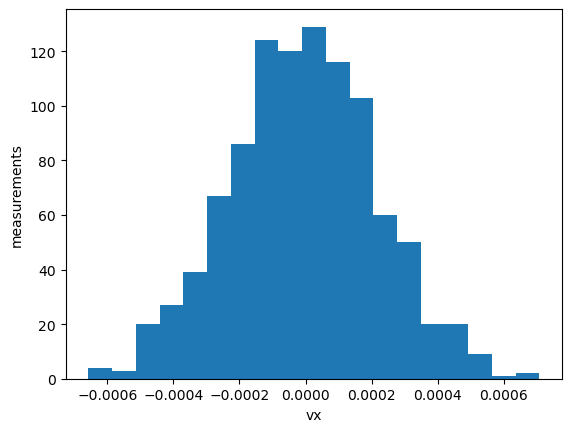

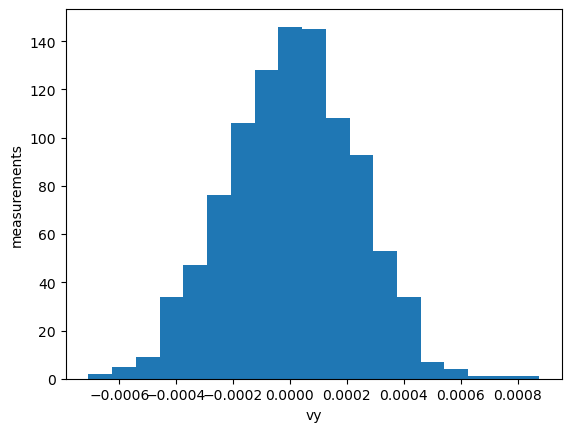

In [658]:
# Generate a sample of 1000 random velocities from a normal distribution
norm_rv = sts.norm(mu, sigma)
sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy= norm_rv.rvs(num_particles) #generate a sample of certain size
# print(sample_v)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('vx')
ax.set_ylabel('measurements')
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('vy')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating cordinates in next frame

Text(0, 0.5, 'measurements')

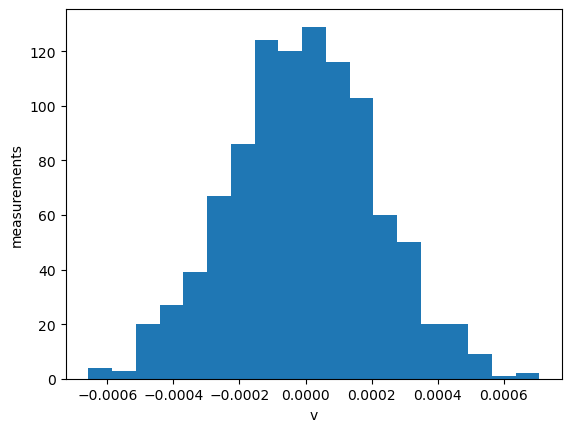

In [659]:
# Simulating the motion of the particles
x_forward=sample_x + sample_vx*dt
x_forward_in_resol=x_forward/spatial_resolution
# print(x_forward_in_resol[:10])
x_forward_trunc=x_forward_in_resol.astype('int64')   
#print(x_forward_trunc)
# print(x_forward_trunc[:10])
x_forward_rough_SI=x_forward_trunc.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vx, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Calculating the discrepancies

[0.    0.    0.    0.    0.003 0.    0.    0.    0.    0.   ]
[-1.53907012e-04 -4.48868708e-04 -2.02416593e-04 -7.38732059e-05
  9.72295793e-05 -1.79129288e-05 -3.86126534e-04 -1.77726134e-04
  7.04581406e-05 -1.30904485e-04]
0.00033294148756878283
1.782494610142489
178.2494610142489


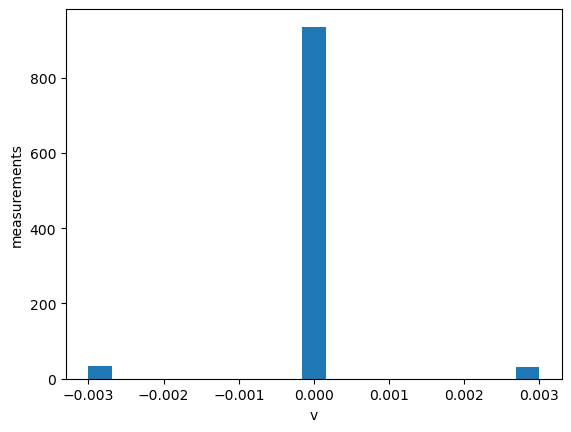

In [660]:
# Calculating restored velocities
v_restored=(x_forward_rough_SI - sample_x_rough_prev_SI)/dt
print(v_restored[:10])
print(sample_vx[:10])   
fig, ax = plt.subplots()
ax.hist(v_restored, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')

# print(sample_vx[:10])

# Calculating the discrepancy between the original and restored velocities
discrepancy=np.abs(sample_vx-v_restored)
print(np.mean(discrepancy))
frac_discrepancy=np.abs(discrepancy/sample_vx)
print(np.mean(frac_discrepancy))
percent_discrepancy=frac_discrepancy*100
print(np.mean(percent_discrepancy))

Code to simulate motion in y

In [661]:
# Generate a sample of 1000 random numbers from a uniform distribution to act as the y coordinates of the particles
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y=unif_y.rvs(num_particles)
sample_y_in_resol= sample_y/spatial_resolution
sample_y_rough= sample_y_in_resol.astype('int64')
sample_y_rough_prev_SI=sample_y_rough.astype('float64')*spatial_resolution

Text(0, 0.5, 'measurements')

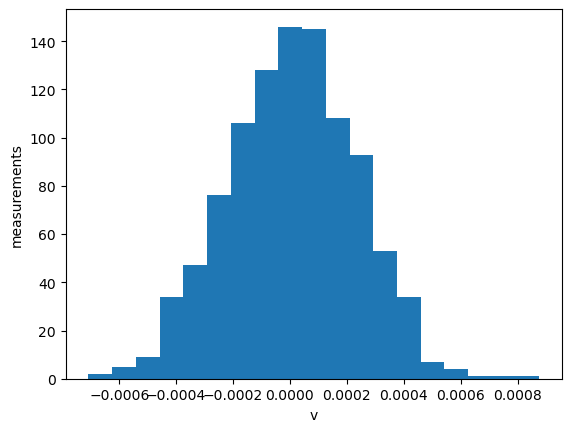

In [662]:
# Simulating the motion of the particles
y_forward=sample_y_rough_prev_SI+sample_vy*dt
y_forward_in_resol=y_forward/spatial_resolution
y_forward_rough=y_forward_in_resol.astype('int64')
# print(x_forward_trunc)
y_forward_rough_SI=y_forward_rough.astype('float64')*spatial_resolution
# print(x_forward_SI)
fig, ax = plt.subplots()
ax.hist(sample_vy, n_bins) # plot histogram
ax.set_xlabel('v')
ax.set_ylabel('measurements')
# print(sample_v)

Making the database of co-ordinates for two frames

In [663]:
def make_velocities(fps,num_particles,spatial_resolution, mu,T, right_border_px, up_border_px,final_frame):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    sigma = np.sqrt(kb*T/mass)
    # print(sigma)
    left=0
    down=0
    down_SI=down*spatial_resolution
    left_SI=left*spatial_resolution
    up_SI=up_border_px*spatial_resolution
    right_SI=right_border_px*spatial_resolution
    frame_full_df=pd.DataFrame()
    while init_frame<=final_frame:
        if init_frame==1:
            # Generate a sample of 1000 random numbers from a uniform distribution to act as the x coordinates of the particles
            unif_x = sts.uniform(left_SI, right_SI-left_SI)
            sample_x=unif_x.rvs(num_particles)
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution
            
            unif_y = sts.uniform(down_SI, up_SI-down_SI)
            sample_y=unif_y.rvs(num_particles)
            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
            # Generate a sample of 1000 random velocities from a normal distribution
            norm_rv = sts.norm(mu, sigma)
            sample_vx = norm_rv.rvs(num_particles) #generate a sample of certain size
            sample_vy = norm_rv.rvs(num_particles) #generate a sample of certain size
            
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [664]:
# Print the DataFrame for each frame
x_y_df = make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up, final_frame)
x_y_df


,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.01230,0.04926,1,0.000,0.000,0.000047,0.000198
1,1,0.04641,0.01752,1,-0.003,-0.003,-0.000036,-0.000106
2,2,0.04407,0.00810,1,-0.003,0.000,-0.000131,0.000176
3,3,0.02379,0.01287,1,-0.003,0.000,-0.000099,0.000360
4,4,0.02220,0.03717,1,-0.003,0.000,-0.000146,0.000074
...,...,...,...,...,...,...,...,...
1995,995,0.03912,0.00378,2,-0.003,-0.003,-0.000053,-0.000253
1996,996,0.04431,0.01800,2,0.000,-0.003,0.000276,-0.000385
1997,997,0.00657,0.03852,2,0.000,0.000,0.000385,0.000110
1998,998,0.01302,0.02811,2,-0.003,0.000,-0.000189,0.000292


<BarContainer object of 19 artists>

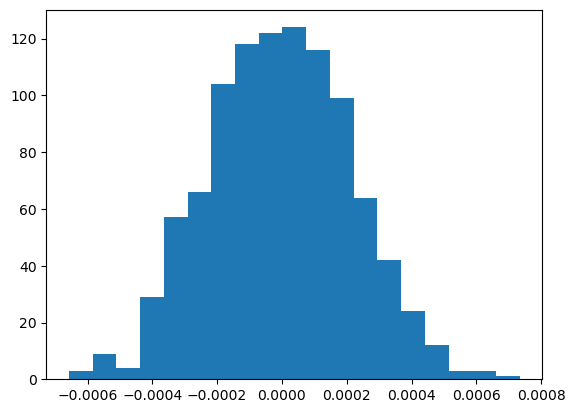

In [665]:
counts_act, bins_act = np.histogram(x_y_df['vx'], bins = n_bins)
fig_act, ax_act = plt.subplots()
arr_bins_centers = 0.5 * (bins_act[1:] + bins_act[:-1])
ax_act.bar(arr_bins_centers, counts_act/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

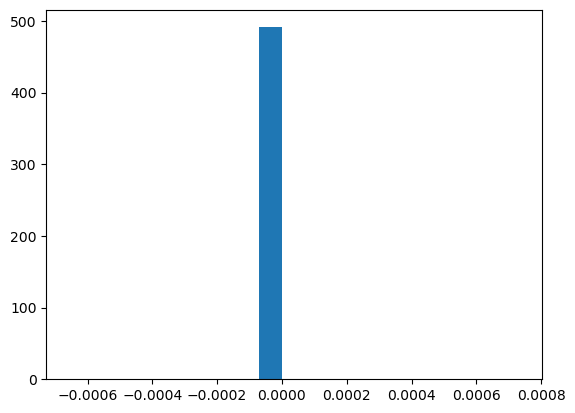

In [666]:
fig, ax = plt.subplots()
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_res_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_res_centers, counts_res/(final_frame), width = (arr_bins_centers[1] - arr_bins_centers[0]))

<BarContainer object of 19 artists>

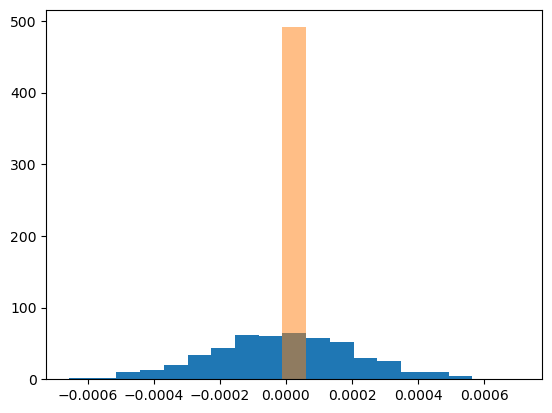

In [667]:
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [668]:
vx_restored=x_y_df['vx (restored)']
sample_vx=x_y_df['vx']
print(np.std(vx_restored))
print(np.std(sample_vx))
print(mass*np.std(sample_vx)**2/constants.Boltzmann)
print(mass*np.std(x_y_df['vx (restored)'])**2/constants.Boltzmann)

0.0014997569803138183
0.00021725749082526774
983.8671065109312
46884.43709651095


Function to get the discrepancies

In [669]:
def get_percent_discrepancies(v_restored,v_actual):
    discrepancy = np.abs(v_actual - v_restored)
    # print(np.mean(discrepancy))
    frac_discrepancy = np.abs(discrepancy / v_actual)
    # print(np.mean(frac_discrepancy))
    percent_discrepancy = frac_discrepancy*100
    # print(np.mean(percent_discrepancy))
    return np.mean(percent_discrepancy)

In [670]:
get_percent_discrepancies(vx_restored,sample_vx)

3695.6718654740457

<BarContainer object of 19 artists>

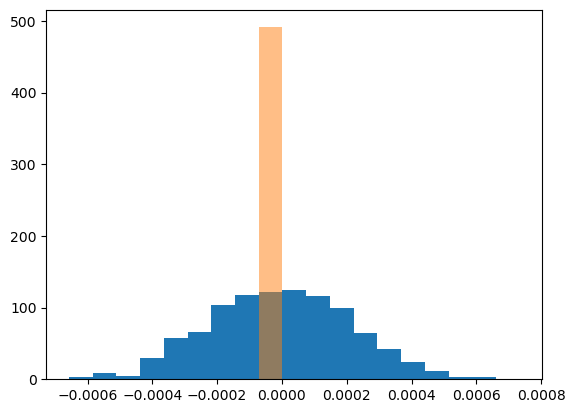

In [671]:
df=make_velocities(fps,num_particles,spatial_resolution, mu,T, right, up,3)
counts, bins = np.histogram(sample_vx, bins = n_bins)
fig, ax = plt.subplots()
arr_bins_centers = 0.5 * (bins[1:] + bins[:-1])
ax.bar(arr_bins_centers, counts/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]))
# print(sample_v)
bins = arr_bins_centers - 0.5 * (arr_bins_centers[1] - arr_bins_centers[0])
bins = np.append(bins, bins[-1] + (bins[1] - bins[0]))
vx_restored = np.array(x_y_df['vx (restored)'])
counts_res, bins_res = np.histogram(vx_restored, bins = bins)
arr_bins_centers = 0.5 * (bins_res[1:] + bins_res[:-1])
ax.bar(arr_bins_centers, counts_res/final_frame, width = (arr_bins_centers[1] - arr_bins_centers[0]),alpha=0.5)

In [672]:
spatial_resolution_arr=np.arange(1E-9,1E-6,1E-8)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))


[1.00e-09 1.10e-08 2.10e-08 3.10e-08 4.10e-08 5.10e-08 6.10e-08 7.10e-08
 8.10e-08 9.10e-08 1.01e-07 1.11e-07 1.21e-07 1.31e-07 1.41e-07 1.51e-07
 1.61e-07 1.71e-07 1.81e-07 1.91e-07 2.01e-07 2.11e-07 2.21e-07 2.31e-07
 2.41e-07 2.51e-07 2.61e-07 2.71e-07 2.81e-07 2.91e-07 3.01e-07 3.11e-07
 3.21e-07 3.31e-07 3.41e-07 3.51e-07 3.61e-07 3.71e-07 3.81e-07 3.91e-07
 4.01e-07 4.11e-07 4.21e-07 4.31e-07 4.41e-07 4.51e-07 4.61e-07 4.71e-07
 4.81e-07 4.91e-07 5.01e-07 5.11e-07 5.21e-07 5.31e-07 5.41e-07 5.51e-07
 5.61e-07 5.71e-07 5.81e-07 5.91e-07 6.01e-07 6.11e-07 6.21e-07 6.31e-07
 6.41e-07 6.51e-07 6.61e-07 6.71e-07 6.81e-07 6.91e-07 7.01e-07 7.11e-07
 7.21e-07 7.31e-07 7.41e-07 7.51e-07 7.61e-07 7.71e-07 7.81e-07 7.91e-07
 8.01e-07 8.11e-07 8.21e-07 8.31e-07 8.41e-07 8.51e-07 8.61e-07 8.71e-07
 8.81e-07 8.91e-07 9.01e-07 9.11e-07 9.21e-07 9.31e-07 9.41e-07 9.51e-07
 9.61e-07 9.71e-07 9.81e-07 9.91e-07]
100


In [673]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities(fps,num_particles,spatial_resolution_loop, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

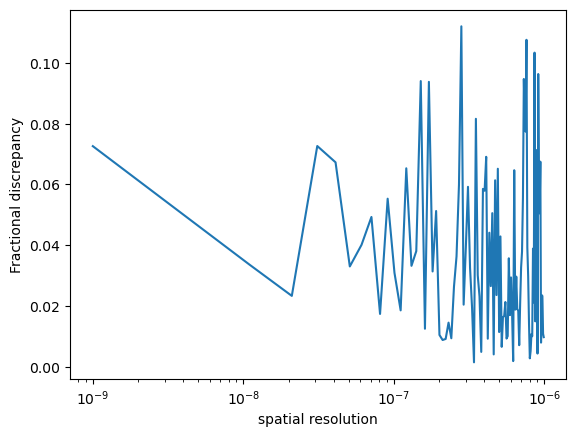

In [674]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
ax.set_xscale('log')

In [675]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))

[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [676]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities(fps_loop,num_particles,spatial_resolution, mu,T, right, up,2)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

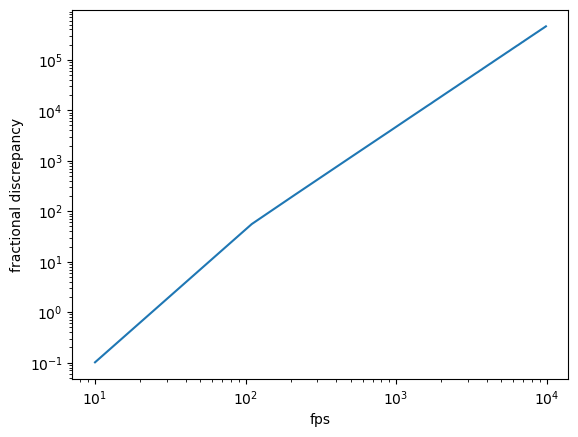

In [677]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

Rough work (trying something out)

In [678]:
unif_x = sts.uniform(left_SI, right_SI-left_SI)
sample_x_trial=unif_x.rvs(num_particles)
unif_y = sts.uniform(down_SI, up_SI-down_SI)
sample_y_trial=unif_y.rvs(num_particles)

norm_rv = sts.norm(mu, sigma)
sample_vx_trial = norm_rv.rvs(num_particles) #generate a sample of certain size
sample_vy_trial= norm_rv.rvs(num_particles) 



In [679]:
def make_velocities_trial(fps,num_particles,spatial_resolution, final_frame, x_init, y_init, vx_init, vy_init):
    dt=1.0/fps
    init_frame=1
    dust_diameter=7.14E-6 
    dust_rho=1510.0
    mass = 4.0 / 3.0 * np.pi * (dust_diameter/ 2.0)**3 * dust_rho #mass of the dust particles
    # print(mass)
    kb=constants.Boltzmann
    # print(sigma)
    frame_full_df=pd.DataFrame()
    sample_x=x_init
    sample_y=y_init
    sample_vx=vx_init
    sample_vy=vy_init
    while init_frame<=final_frame:
        if init_frame==1:
            sample_x_in_resol= sample_x/spatial_resolution
            sample_x_trunc= sample_x_in_resol.astype('int64')
            sample_x_trunc_SI=sample_x_trunc.astype('float64')*spatial_resolution

            sample_y_in_resol= sample_y/spatial_resolution
            sample_y_trunc= sample_y_in_resol.astype('int64')
            sample_y_trunc_SI=sample_y_trunc.astype('float64')*spatial_resolution

            part_no = np.arange(0,num_particles,dtype = 'int') # array of particles ID numbers
                
        # Simulating the motion of the particles for x coordinates
        x_forward = sample_x_trunc_SI + sample_vx*dt
        x_forward_in_resol = x_forward / spatial_resolution
        x_forward_trunc = x_forward_in_resol.astype('int64')
        x_forward_SI = x_forward_trunc.astype('float64') * spatial_resolution
        # Simulating the motion of the particles for y coordinates
        y_forward = sample_y_trunc_SI + sample_vy * dt
        y_forward_in_resol = y_forward / spatial_resolution
        y_forward_trunc = y_forward_in_resol.astype('int64')
        y_forward_SI=y_forward_trunc.astype('float64')*spatial_resolution

        # Calculating restored velocities
        v_restored_x=(x_forward_SI- sample_x_trunc_SI)/dt
        v_restored_y=(y_forward_SI- sample_y_trunc_SI)/dt
        # Append the data for the current frame
        frame_data={'part_no':part_no, 'x': sample_x_trunc_SI, 'y':sample_y_trunc_SI, 'frame': init_frame,'vx (restored)': v_restored_x, 'vy (restored)': v_restored_y, 'vx': sample_vx, 'vy': sample_vy}
        frame_df=pd.DataFrame(frame_data)
        frame_full_df = pd.concat([frame_full_df, frame_df], ignore_index=True)
        sample_x_trunc_SI=x_forward_SI
        sample_y_trunc_SI= y_forward_SI
        init_frame+=1
    return frame_full_df

In [680]:
trial=make_velocities_trial(fps,num_particles,spatial_resolution, 2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
trial

,part_no,x,y,frame,vx (restored),vy (restored),vx,vy
0,0,0.04524,0.04983,1,0.000,-0.003,0.000298,-0.000333
1,1,0.03747,0.04473,1,0.000,0.000,0.000513,0.000094
2,2,0.02652,0.04542,1,-0.003,0.000,-0.000012,0.000332
3,3,0.04323,0.00699,1,-0.003,-0.003,-0.000293,-0.000140
4,4,0.01875,0.00036,1,0.000,-0.003,0.000085,-0.000180
...,...,...,...,...,...,...,...,...
1995,995,0.04710,0.00891,2,-0.003,0.000,-0.000356,0.000024
1996,996,0.03414,0.02292,2,0.000,0.000,0.000205,0.000401
1997,997,0.00234,0.03225,2,0.000,-0.003,0.000103,-0.000114
1998,998,0.01653,0.04206,2,0.000,-0.003,0.000043,-0.000271


In [681]:
fps_arr=np.arange(1E1,1E4,1E2)
print(fps_arr)
print(len(fps_arr))


[  10.  110.  210.  310.  410.  510.  610.  710.  810.  910. 1010. 1110.
 1210. 1310. 1410. 1510. 1610. 1710. 1810. 1910. 2010. 2110. 2210. 2310.
 2410. 2510. 2610. 2710. 2810. 2910. 3010. 3110. 3210. 3310. 3410. 3510.
 3610. 3710. 3810. 3910. 4010. 4110. 4210. 4310. 4410. 4510. 4610. 4710.
 4810. 4910. 5010. 5110. 5210. 5310. 5410. 5510. 5610. 5710. 5810. 5910.
 6010. 6110. 6210. 6310. 6410. 6510. 6610. 6710. 6810. 6910. 7010. 7110.
 7210. 7310. 7410. 7510. 7610. 7710. 7810. 7910. 8010. 8110. 8210. 8310.
 8410. 8510. 8610. 8710. 8810. 8910. 9010. 9110. 9210. 9310. 9410. 9510.
 9610. 9710. 9810. 9910.]
100


In [682]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(fps_arr)):
    fps_loop=fps_arr[i]
    df=make_velocities_trial(fps_loop,num_particles,spatial_resolution,2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

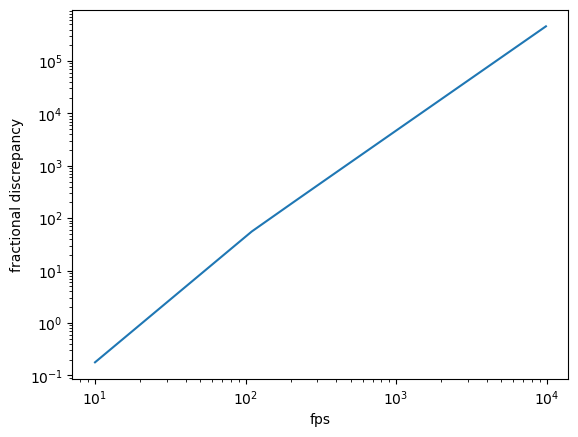

In [683]:
fig, ax = plt.subplots()
ax.plot(fps_arr, T_discrepancy_arr)
ax.set_xlabel('fps')
ax.set_ylabel('fractional discrepancy')
ax.set_xscale('log')
ax.set_yscale('log')

In [684]:
spatial_resolution_arr=np.logspace(-10,-5,1000)
print(spatial_resolution_arr)
print(len(spatial_resolution_arr))

[1.00000000e-10 1.01159111e-10 1.02331658e-10 1.03517796e-10
 1.04717682e-10 1.05931476e-10 1.07159340e-10 1.08401436e-10
 1.09657929e-10 1.10928986e-10 1.12214777e-10 1.13515471e-10
 1.14831241e-10 1.16162263e-10 1.17508713e-10 1.18870770e-10
 1.20248614e-10 1.21642429e-10 1.23052400e-10 1.24478715e-10
 1.25921561e-10 1.27381132e-10 1.28857621e-10 1.30351224e-10
 1.31862140e-10 1.33390569e-10 1.34936714e-10 1.36500781e-10
 1.38082977e-10 1.39683512e-10 1.41302599e-10 1.42940453e-10
 1.44597292e-10 1.46273336e-10 1.47968806e-10 1.49683929e-10
 1.51418933e-10 1.53174046e-10 1.54949504e-10 1.56745541e-10
 1.58562396e-10 1.60400311e-10 1.62259529e-10 1.64140297e-10
 1.66042866e-10 1.67967487e-10 1.69914417e-10 1.71883914e-10
 1.73876240e-10 1.75891659e-10 1.77930439e-10 1.79992851e-10
 1.82079168e-10 1.84189668e-10 1.86324631e-10 1.88484341e-10
 1.90669084e-10 1.92879151e-10 1.95114835e-10 1.97376433e-10
 1.99664245e-10 2.01978576e-10 2.04319732e-10 2.06688025e-10
 2.09083769e-10 2.115072

In [685]:
discrepancy_arr=[]
T_discrepancy_arr=[]
for i in range(len(spatial_resolution_arr)):
    spatial_resolution_loop=spatial_resolution_arr[i]
    df=make_velocities_trial(300,num_particles,spatial_resolution_loop,2, sample_x_trial, sample_y_trial, sample_vx_trial, sample_vy_trial)
    discrepancy=get_percent_discrepancies(df[df['frame']==1]['vx (restored)'],df[df['frame']==1]['vx'])
    discrepancy_arr.append(discrepancy)
    T_restored=mass*np.std(df[df['frame']==1]['vx (restored)'])**2/constants.Boltzmann
    T_discrepancy_arr.append(np.abs(T-T_restored)/T)

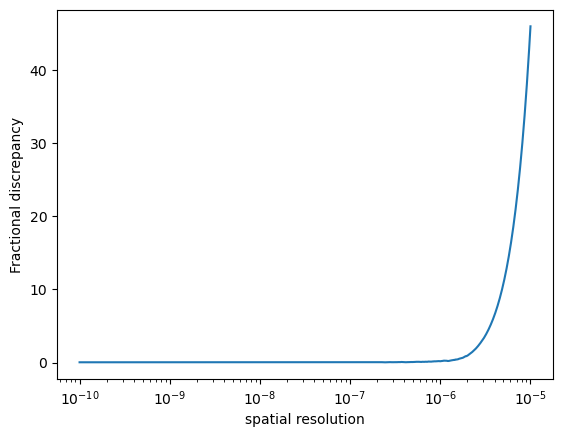

In [686]:
fig, ax = plt.subplots()
ax.plot(spatial_resolution_arr, T_discrepancy_arr)
ax.set_xlabel('spatial resolution')
ax.set_ylabel('Fractional discrepancy')
ax.set_xscale('log')